# Iris Dataset EDA

In [1]:
path = "/content/Iris.csv"

In [3]:
import pandas as pd

df = pd.read_csv(path)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [15]:
data = df.drop_duplicates(subset="Species")

data.shape

(3, 6)

In [16]:
df.value_counts("Species")

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

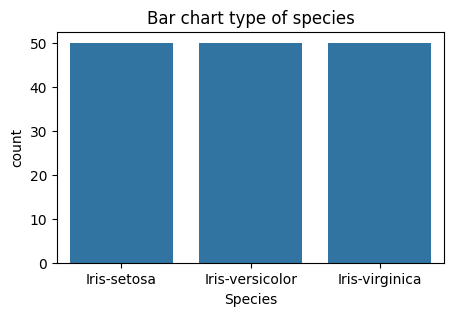

In [19]:
plt.figure(figsize=(5,3))

sns.countplot(x="Species", data=df)

plt.title("Bar chart type of species")

plt.show()

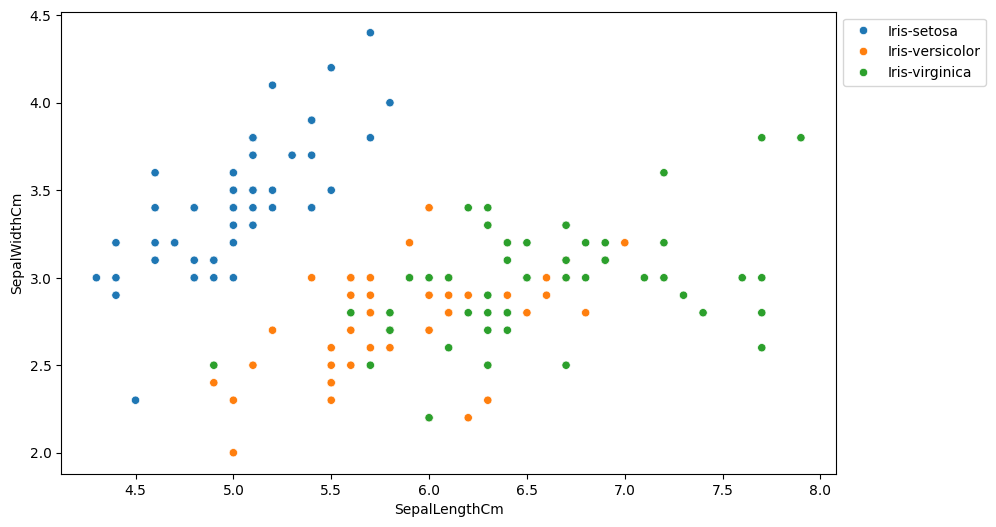

In [23]:
plt.figure(figsize=(10,6))

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)

plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

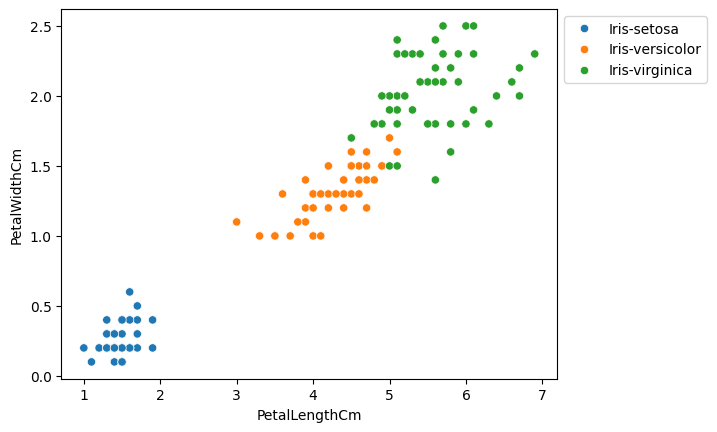

In [29]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df )

plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

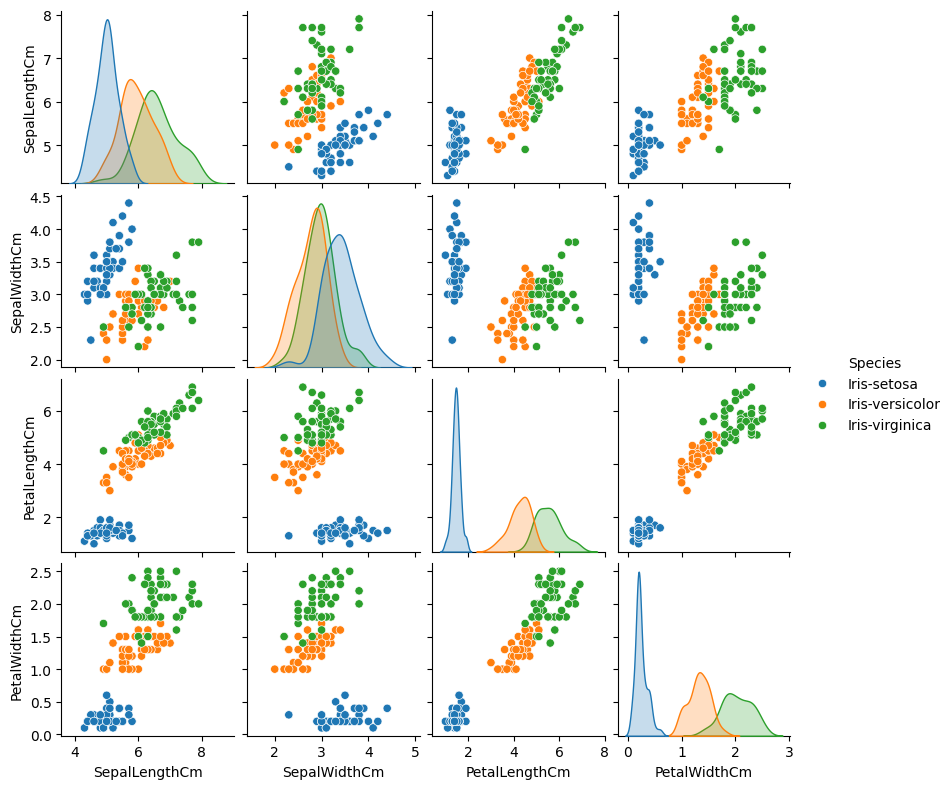

In [32]:
sns.pairplot(df.drop(["Id"], axis=1), hue="Species", height=2)

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

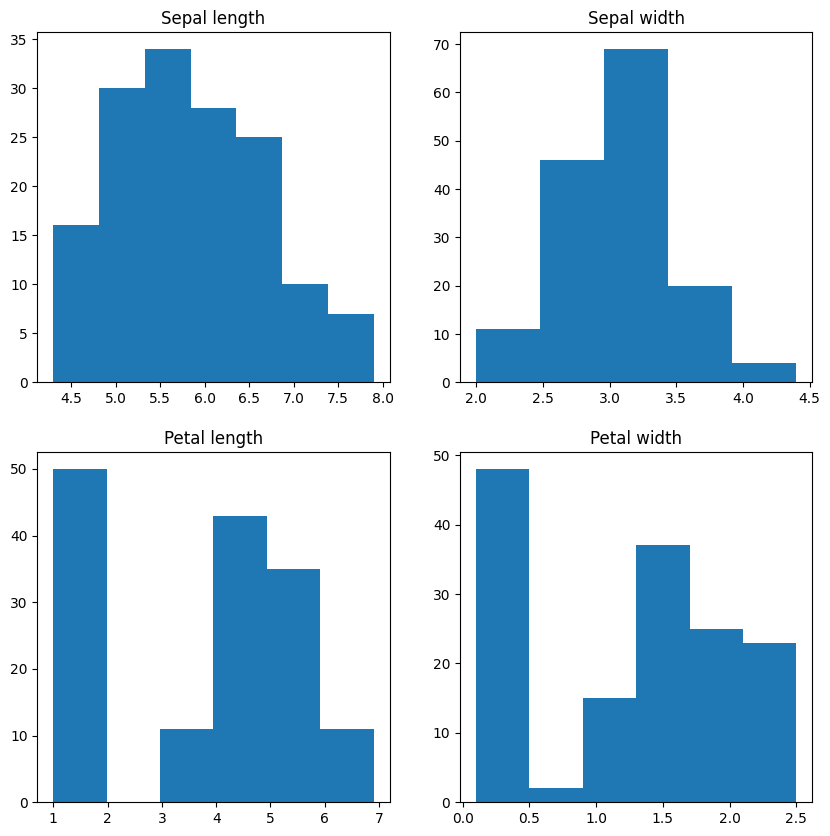

In [33]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].set_title("Sepal length")
axes[0,0].hist(df["SepalLengthCm"], bins=7)

axes[0,1].set_title("Sepal width")
axes[0,1].hist(df["SepalWidthCm"], bins=5)

axes[1,0].set_title("Petal length")
axes[1,0].hist(df["PetalLengthCm"], bins=6)

axes[1,1].set_title("Petal width")
axes[1,1].hist(df["PetalWidthCm"], bins=6)

In [20]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

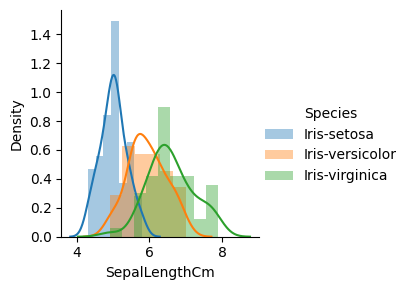

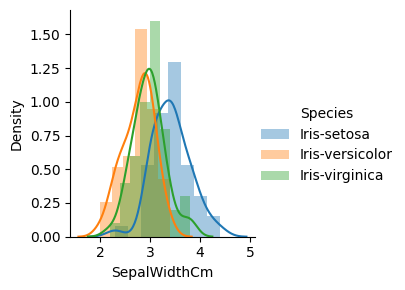

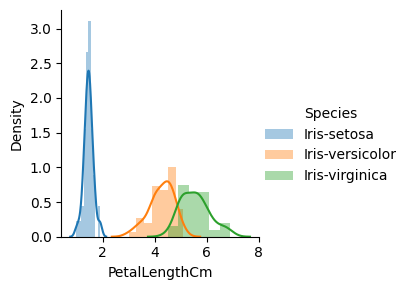

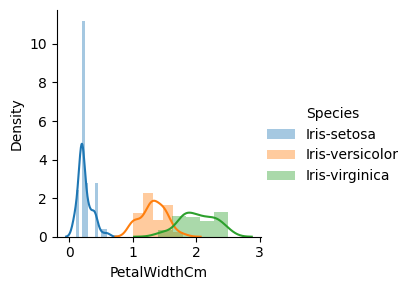

In [36]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()

plt.show()

In [45]:
num_df = df.copy()

In [49]:
list_species = list(num_df["Species"].unique())

In [50]:
num_df["Species"] = pd.Categorical(
    num_df["Species"],
    categories=list_species,
    ordered=True
).codes

In [60]:
num_df.drop(["Id"], axis=1, inplace=True)

In [62]:
pearson_corr = num_df.corr()
kendall_corr = num_df.corr(method="kendall")
spearman_corr = num_df.corr(method="spearman")

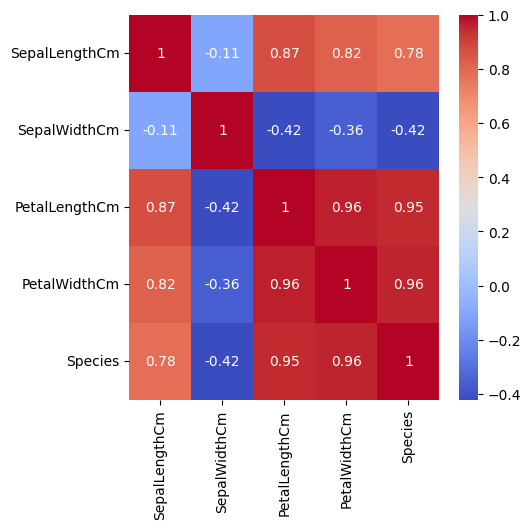

In [67]:
plt.figure(figsize=(5, 5))

sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")

plt.show()

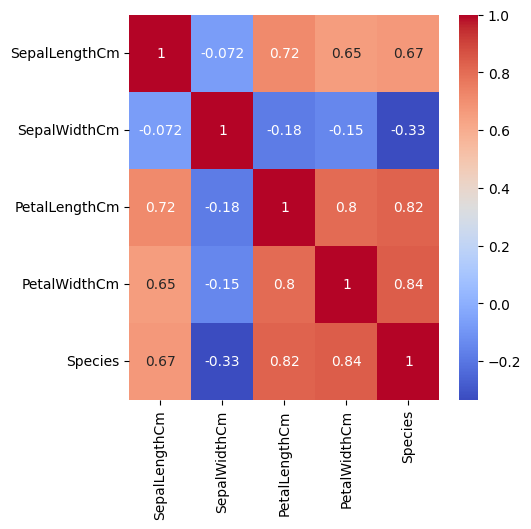

In [68]:
plt.figure(figsize=(5, 5))

sns.heatmap(kendall_corr, annot=True, cmap="coolwarm")

plt.show()

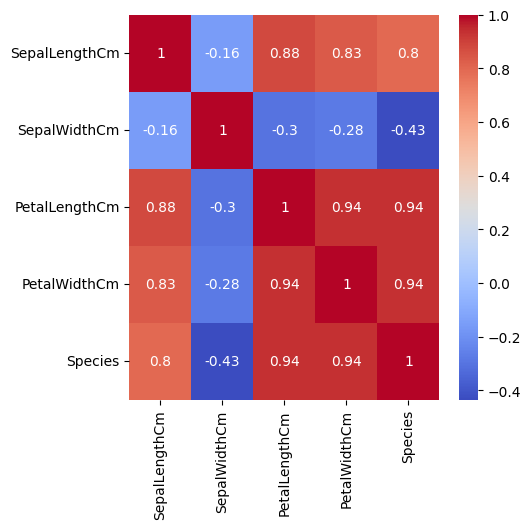

In [69]:
plt.figure(figsize=(5, 5))

sns.heatmap(spearman_corr, annot=True, cmap="coolwarm")

plt.show()

In [70]:
num_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

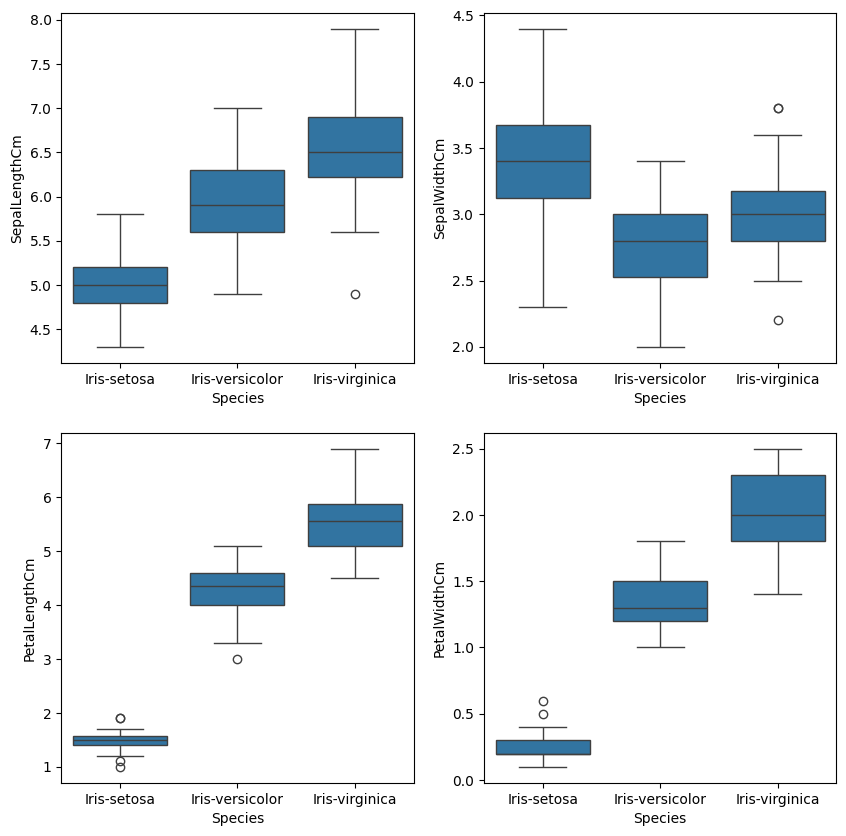

In [72]:

def graph(y):
  sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))

plt.subplot(221)
graph("SepalLengthCm")

plt.subplot(222)
graph("SepalWidthCm")

plt.subplot(223)
graph("PetalLengthCm")

plt.subplot(224)
graph("PetalWidthCm")

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

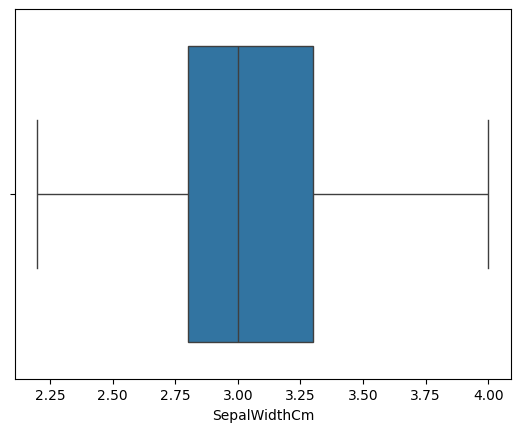

In [73]:
import numpy as np

df = pd.read_csv('Iris.csv')

Q1 = np.percentile(df['SepalWidthCm'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['SepalWidthCm'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))

lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)